In [93]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_percentage_error,mean_absolute_error
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import neighbors


In [94]:
insurance=pd.read_csv("insurance.csv")
df=insurance.copy()
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [96]:
df.shape

(1338, 7)

In [97]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [98]:
df.corr()

<ipython-input-98-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [99]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<ipython-input-100-7212aa57cc85>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(df['bmi'], kde=True, color='c')


Text(0.5, 1.0, 'Body Mass INDEX')

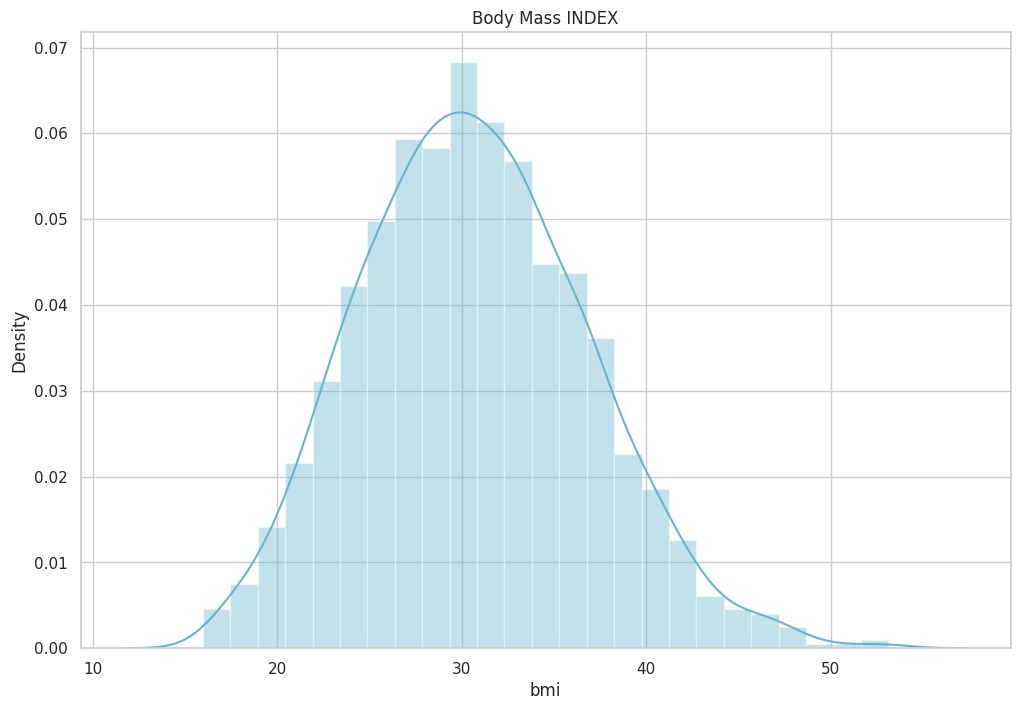

In [100]:
sns.set(style='whitegrid')
f, ax=plt.subplots(1,1, figsize=(12, 8))
ax=sns.distplot(df['bmi'], kde=True, color='c')
plt.title('Body Mass INDEX')

In [101]:
selected_data=df[["smoker", "charges"]]

In [102]:
selected_data["smoker"] = selected_data["smoker"].map({"no": 0, "yes": 1})

<ipython-input-102-2decb041757f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data["smoker"] = selected_data["smoker"].map({"no": 0, "yes": 1})


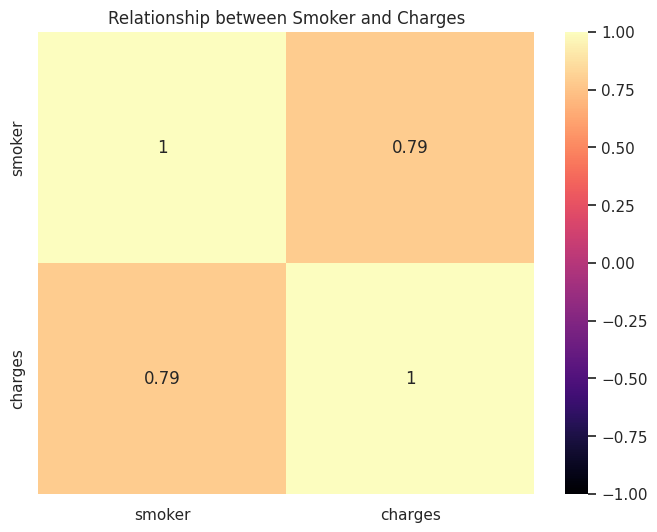

In [103]:
plt.figure(figsize=(8, 6))
heatmap_data = selected_data.corr()
sns.heatmap(heatmap_data, annot=True, cmap="magma", vmin=-1, vmax=1)
plt.title("Relationship between Smoker and Charges")
plt.show()

In [104]:
cross_tab = pd.crosstab(df['smoker'], df['region'])
print(cross_tab)

region  northeast  northwest  southeast  southwest
smoker                                            
no            257        267        273        267
yes            67         58         91         58


<Figure size 1000x600 with 0 Axes>

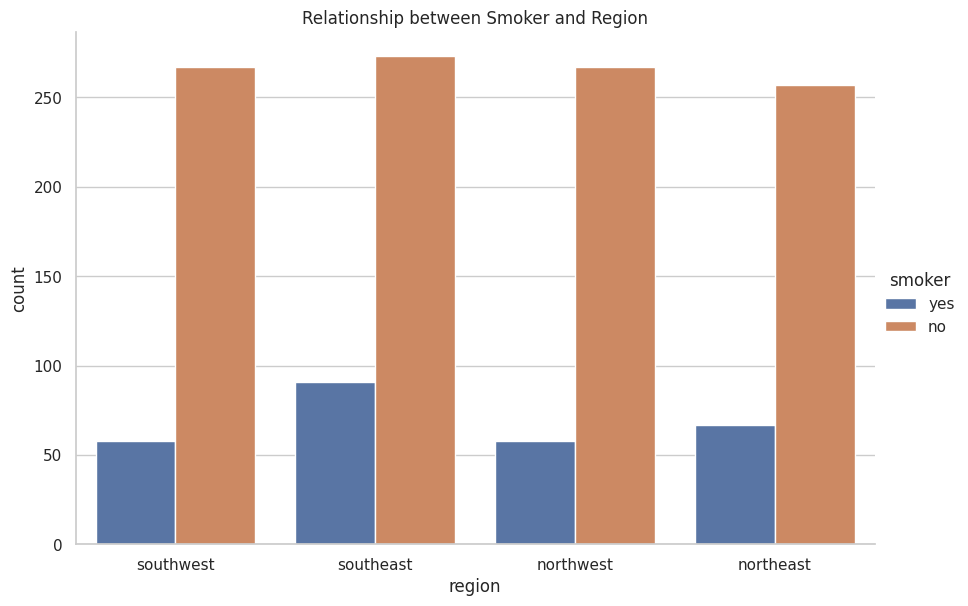

In [105]:
plt.figure(figsize=(10, 6))
sns.catplot(data=df, x="region", hue="smoker", kind="count", height=6, aspect=1.5)
plt.title("Relationship between Smoker and Region")
plt.show()

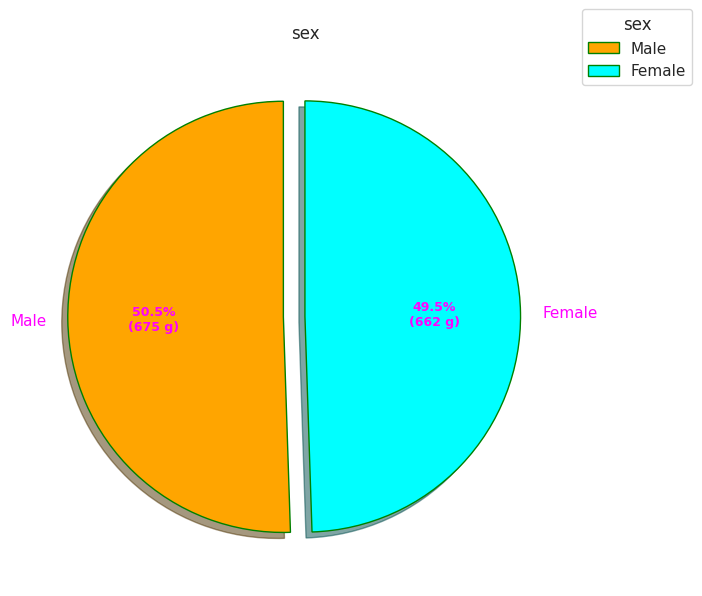

In [106]:
fig, ax = plt.subplots(figsize=(10,7))
sex = ['Male', "Female"]
data = list(df["sex"].value_counts().values)

explode = (0.1, 0.0)

colors= ("orange", "cyan")

wp = {
    "linewidth": 1,
    "edgecolor": "green"
}

def func(pct, allvalues):
  absolute = int(pct / 100 * np.sum(allvalues))
  return "{:.1f}%\n({:d} g)".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data,
                                    autopct = lambda pct: func(pct, data),
                                    explode = explode,
                                    labels = sex,
                                    shadow = True,
                                    colors = colors,
                                    startangle = 90,
                                    wedgeprops = wp,
                                    textprops = dict(color="magenta"))

ax.legend(wedges, sex,
          title="sex",
          loc="center left",
          bbox_to_anchor=(1, 0.5, 0.5, 1))

plt.setp(autotexts, size=9, weight="bold")
ax.set_title("sex")

plt.show()

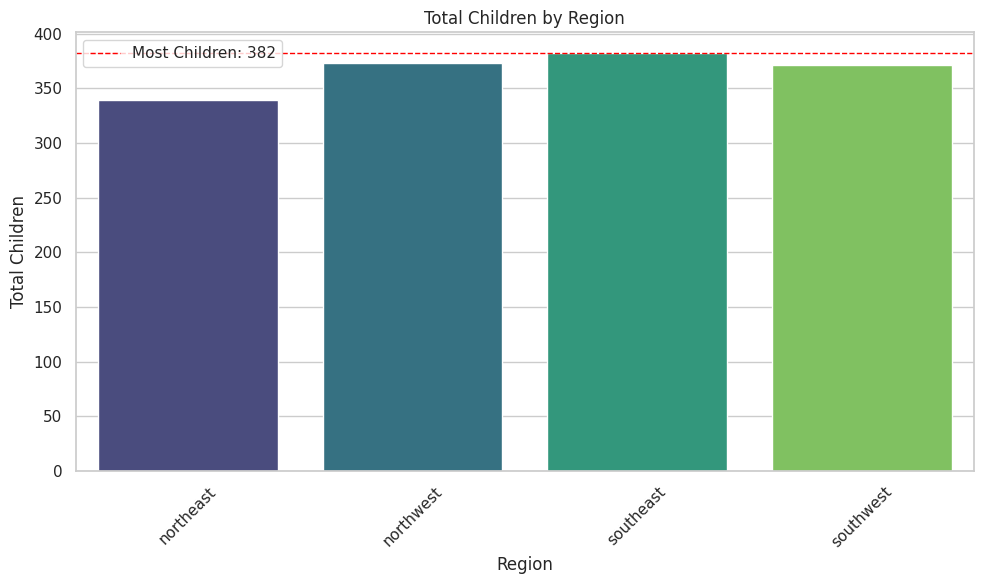

In [107]:
region_children_sum = df.groupby("region")["children"].sum()

region_with_most_children = region_children_sum.idxmax()
most_children_count = region_children_sum.max()

plt.figure(figsize=(10, 6))
sns.barplot(x=region_children_sum.index, y=region_children_sum.values, palette="viridis")
plt.title("Total Children by Region")
plt.xlabel("Region")
plt.ylabel("Total Children")
plt.axhline(most_children_count, color='red', linestyle='dashed', label=f'Most Children: {most_children_count}', linewidth=1)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

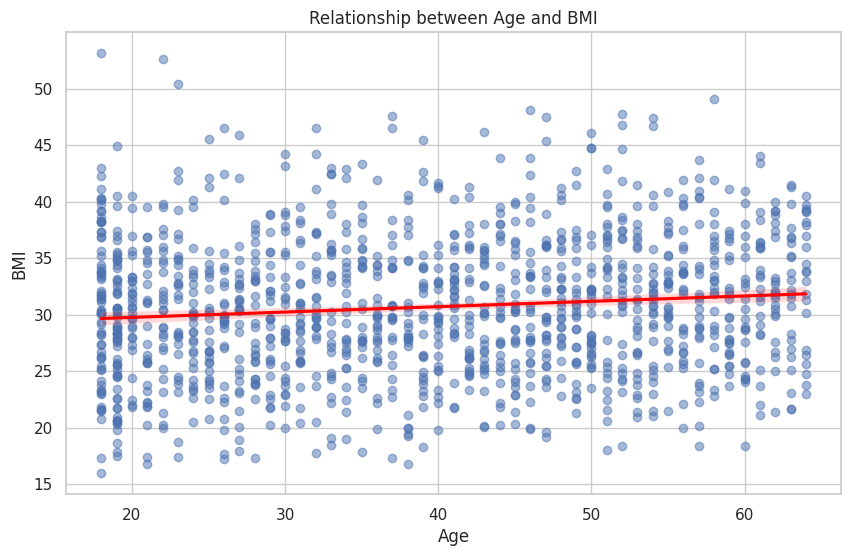

In [108]:
plt.figure(figsize=(10, 6))
sns.regplot(x='age', y='bmi', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Relationship between Age and BMI")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.show()

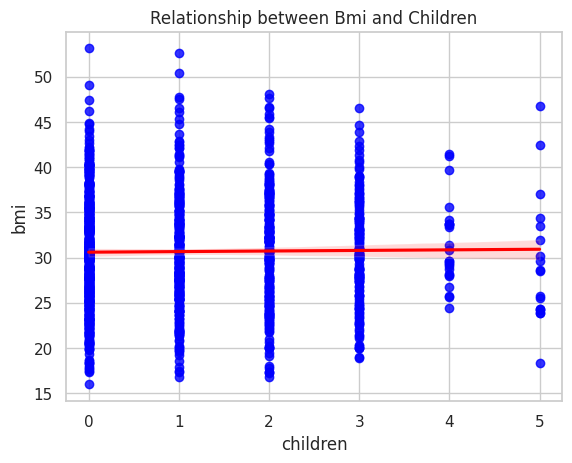

In [109]:
sns.regplot(data=df, y="bmi", x='children', dropna=True, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.xlabel("children")
plt.ylabel("bmi")
plt.title("Relationship between Bmi and Children")
plt.show()


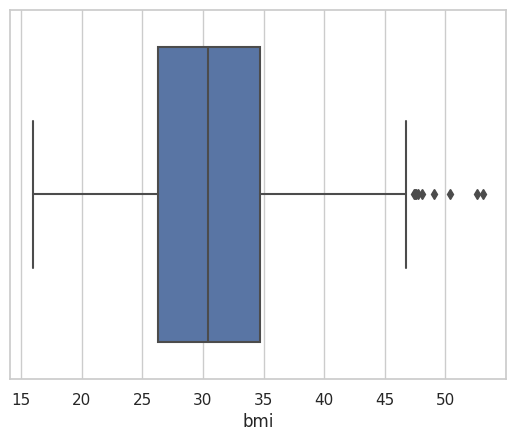

In [110]:
sns.boxplot(x=df["bmi"]);

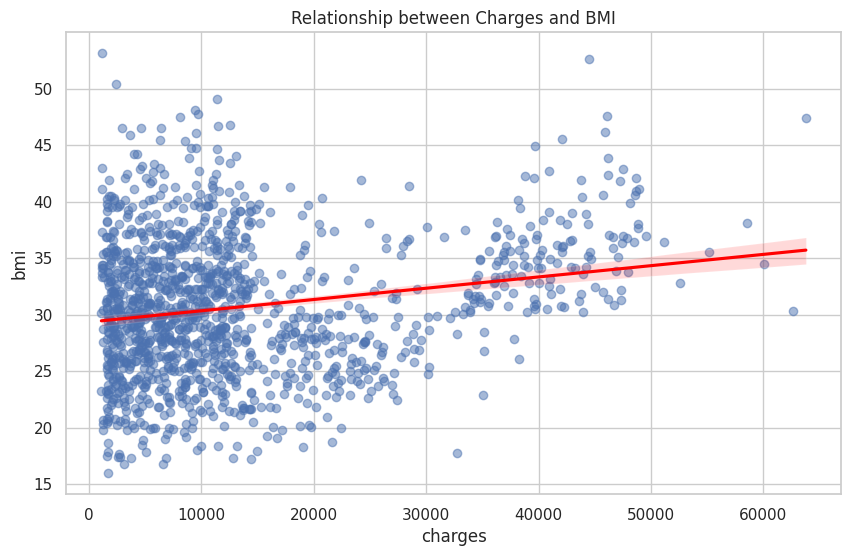

In [111]:
plt.figure(figsize=(10, 6))
sns.regplot(x='charges', y='bmi', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Relationship between Charges and BMI")
plt.xlabel("charges")
plt.ylabel("bmi")
plt.show()

In [112]:
df[["charges","bmi"]].corr()

,charges,bmi
charges,1.000000,0.198341
bmi,0.198341,1.000000


<ipython-input-113-12de1c384028>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="region", y="bmi", hue="smoker", ci=None)


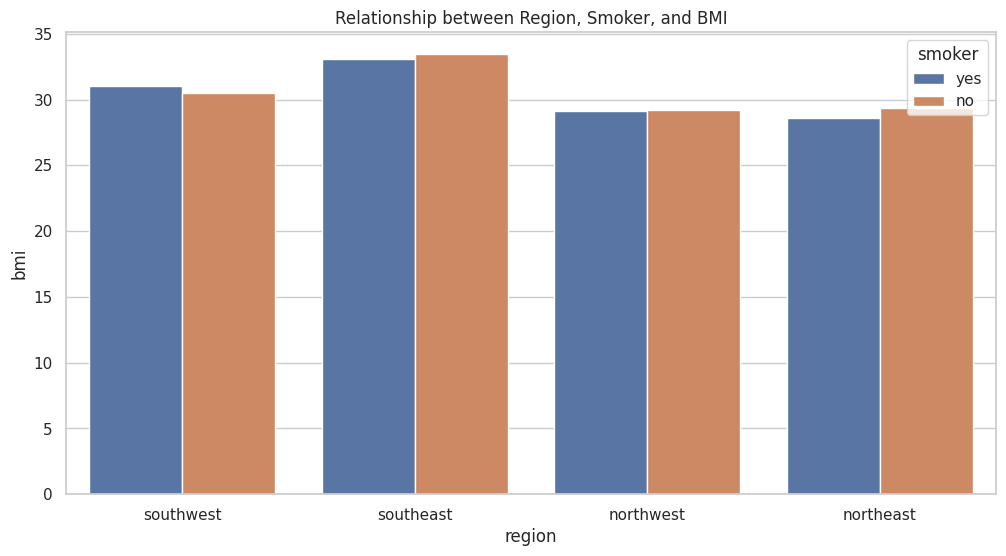

In [113]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="region", y="bmi", hue="smoker", ci=None)
plt.title("Relationship between Region, Smoker, and BMI")
plt.xlabel("region")
plt.ylabel("bmi")
plt.legend(title="smoker")
plt.show()

In [114]:
df['sex'] = pd.factorize(df['sex'])[0] + 1
df['region'] = pd.factorize(df['region'])[0] + 1
df['smoker'] = pd.factorize(df['smoker'])[0] + 1
corr = df.corr()
corr['charges'].sort_values(ascending=False)

charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region      0.006208
smoker     -0.787251
Name: charges, dtype: float64

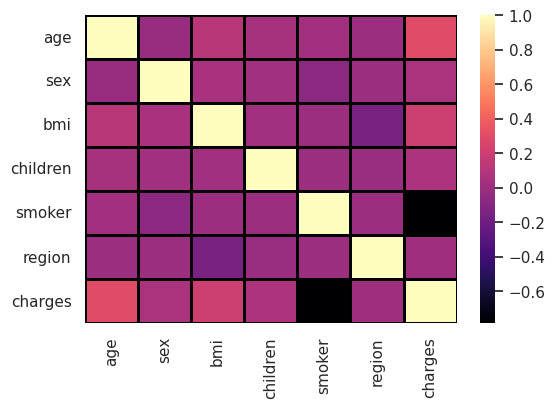

In [115]:
fig = plt.figure(figsize = (6, 4))
data_ploting = df.corr(method= 'pearson')
sns.heatmap(data_ploting, cmap='magma', linecolor='black', linewidths= 2 )
plt.show()

<Figure size 600x400 with 0 Axes>

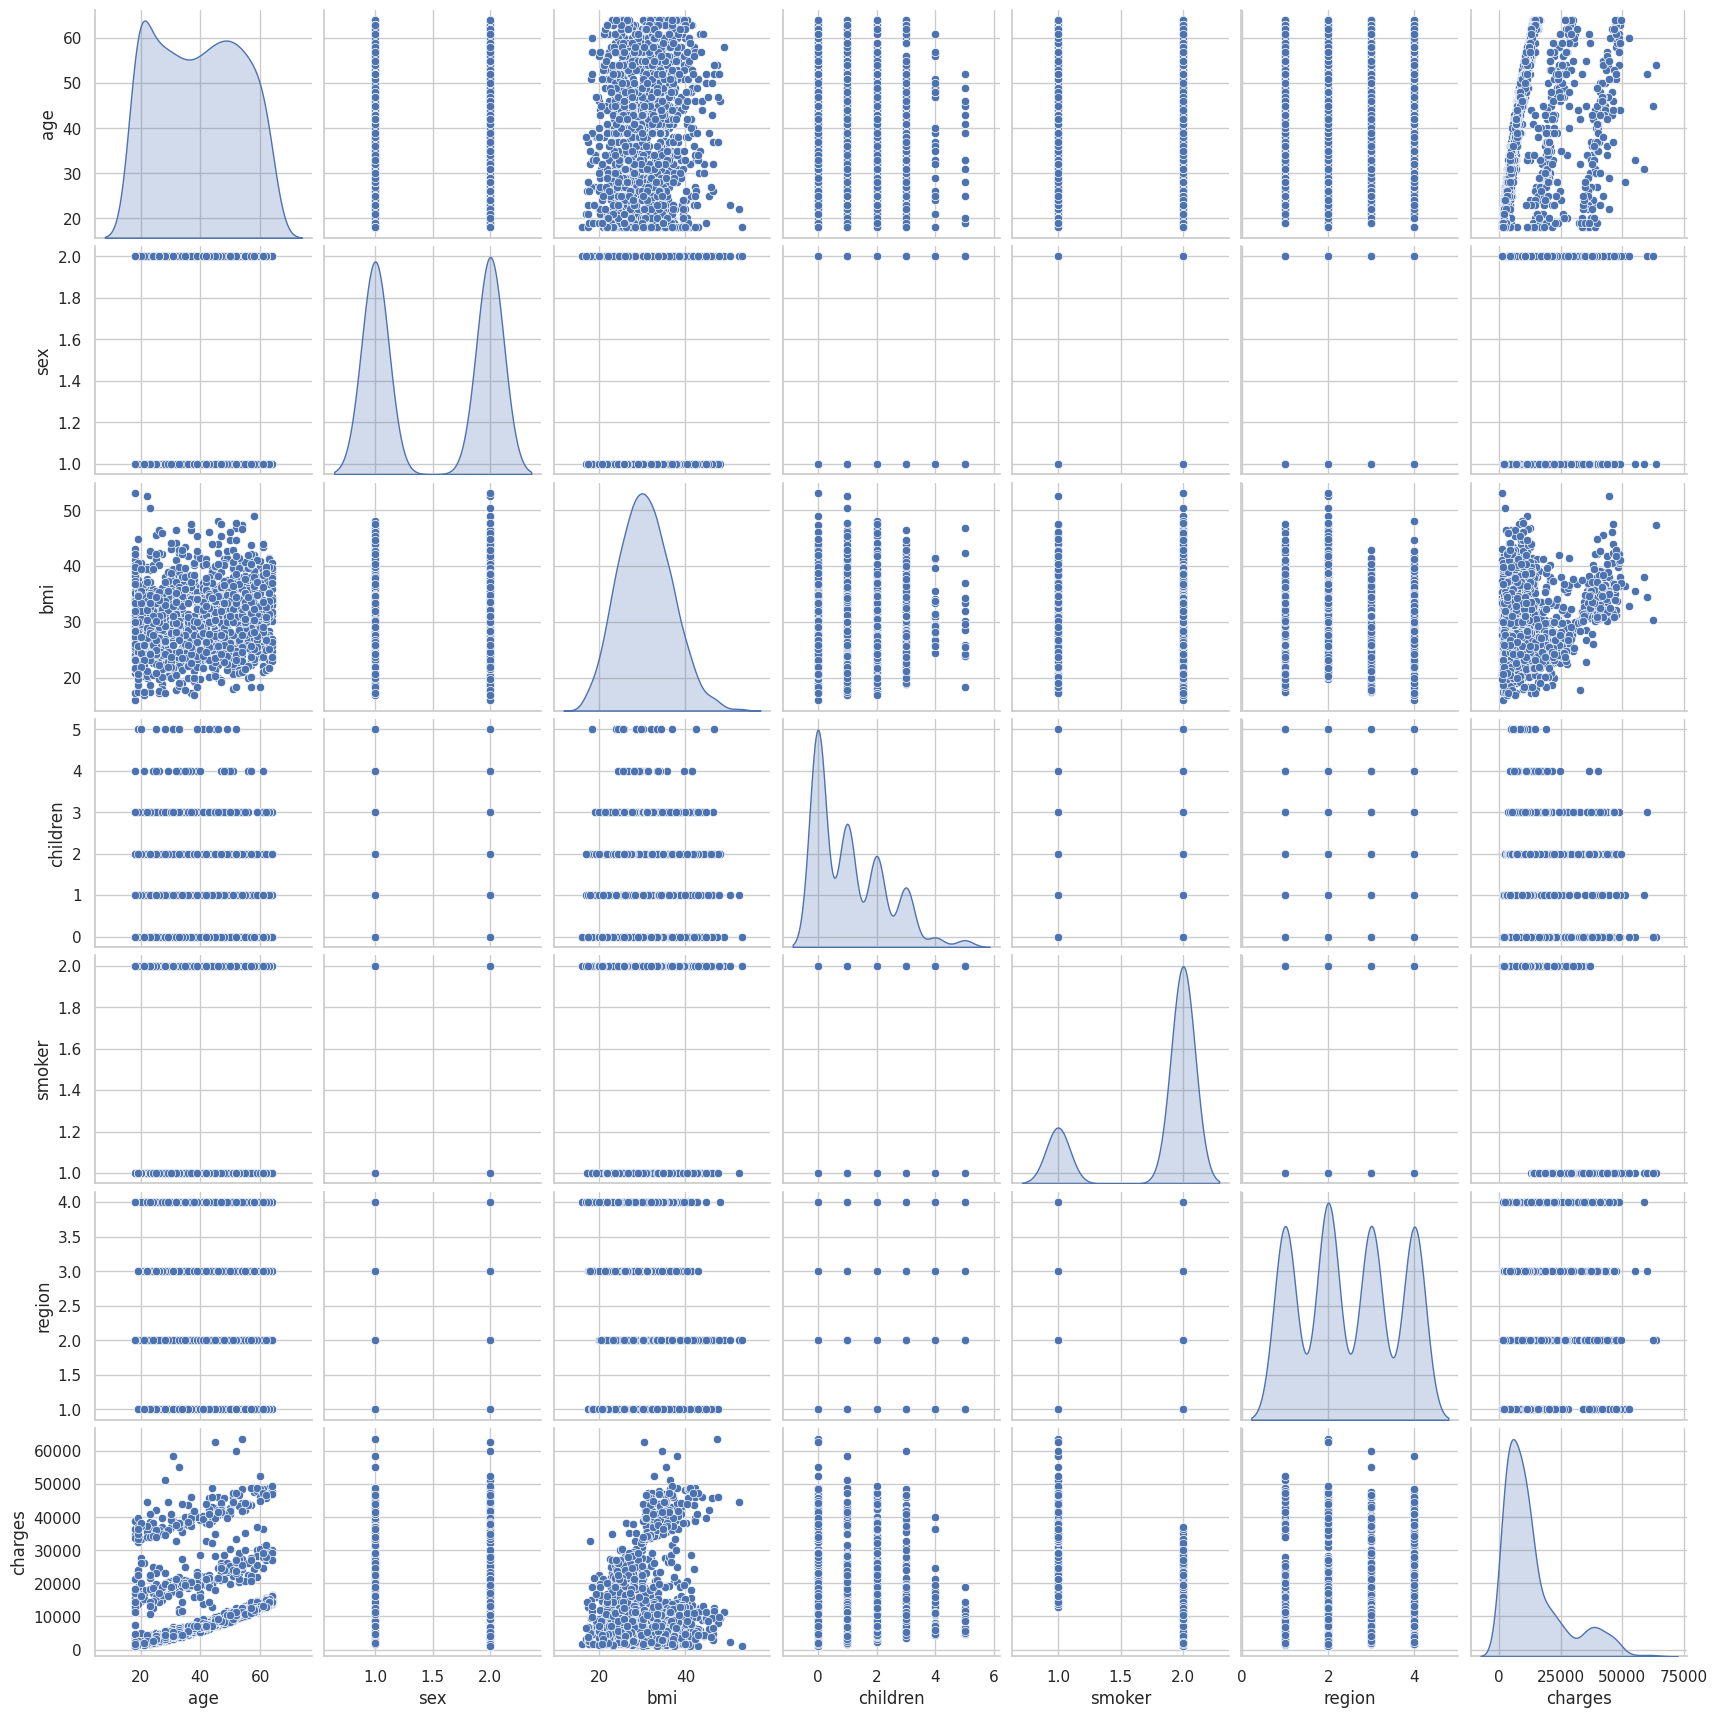

In [116]:
fig = plt.figure(figsize = (6, 4))
sns.pairplot(df,diag_kind='kde');

In [117]:
df.shape

(1338, 7)

In [118]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,2,33.770,1,2,2,1725.55230
2,28,2,33.000,3,2,2,4449.46200
3,33,2,22.705,0,2,3,21984.47061
4,32,2,28.880,0,2,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,2,30.970,3,2,3,10600.54830
1334,18,1,31.920,0,2,4,2205.98080
1335,18,1,36.850,0,2,2,1629.83350
1336,21,1,25.800,0,2,1,2007.94500


In [119]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,2,33.770,1,2,2,1725.55230
2,28,2,33.000,3,2,2,4449.46200
3,33,2,22.705,0,2,3,21984.47061
4,32,2,28.880,0,2,3,3866.85520


In [120]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,1.505232,30.663397,1.094918,1.795217,2.484305,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,1.000000,15.960000,0.000000,1.000000,1.000000,1121.873900
25%,27.000000,1.000000,26.296250,0.000000,2.000000,2.000000,4740.287150
50%,39.000000,2.000000,30.400000,1.000000,2.000000,2.000000,9382.033000
75%,51.000000,2.000000,34.693750,2.000000,2.000000,3.000000,16639.912515
max,64.000000,2.000000,53.130000,5.000000,2.000000,4.000000,63770.428010


In [121]:
df = pd.concat([df, one_hot], axis=1)
df.drop("region", axis=1, inplace=True)

In [122]:
df.nunique()

age            47
sex             2
bmi           548
children        6
smoker          2
charges      1337
northeast       2
northwest       2
southeast       2
southwest       2
dtype: int64

In [83]:
one_hot = pd.get_dummies(df["region"])
one_hot.head()

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 73.3+ KB


In [123]:
X = df.drop(columns="charges", axis=1)
y = df['charges']

In [126]:
X

array([[0.02173913, 0.        , 0.3212268 , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 1.        , 0.47914985, ..., 0.        , 1.        ,
        0.        ],
       [0.2173913 , 1.        , 0.45843422, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.56201238, ..., 0.        , 1.        ,
        0.        ],
       [0.06521739, 0.        , 0.26472962, ..., 0.        , 0.        ,
        1.        ],
       [0.93478261, 0.        , 0.35270379, ..., 1.        , 0.        ,
        0.        ]])

In [48]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [128]:
X_train.shape, X_test.shape

((1070, 9), (268, 9))

In [129]:
y_train.shape, y_test.shape

((1070,), (268,))

In [130]:
linreg = LinearRegression()
DecTree = DecisionTreeRegressor()
Rand_forest = RandomForestRegressor()
SVM = SVR()

In [132]:
linreg_scores = cross_val_score(linreg,
                                X_train, y_train,
                                scoring="neg_mean_squared_error",
                                cv=10)

In [133]:
linreg_scores

array([-36889556.15138056, -43353483.42615781, -27156105.47870509,
       -36545076.53517249, -34064321.21101745, -37545462.85261905,
       -52972471.87496123, -39961704.41522814, -38357145.09175085,
       -31828171.96453474])

In [136]:
DecTree_scores = cross_val_score(DecTree,
                                X_train, y_train,
                                scoring="neg_mean_squared_error",
                                cv=10)

In [144]:
score_display(DecTree_scores)


  RMSE Scores:[6552.70915571 6424.02394685 6622.00259988 6761.37277593 6614.30070945
 6467.84537328 7905.83809259 6684.03368811 6356.2263039  5668.15781517],
  Mean: 6605.6510460876625,
  Standart Deviation: 521.2590097090329
  


In [145]:
svm_scores = cross_val_score(SVM,
                                X_train, y_train,
                                scoring="neg_mean_squared_error",
                                cv=10)

In [146]:
def score_display(scores):
  scores = np.sqrt(-scores)
  print(f"""
  RMSE Scores:{scores},
  Mean: {scores.mean()},
  Standart Deviation: {scores.std()}
  """)

In [147]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [148]:
score_display(linreg_scores)


  RMSE Scores:[6073.67731703 6584.33621758 5211.1520299  6045.25239632 5836.4647871
 6127.43525895 7278.21900433 6321.52706355 6193.3145481  5641.64621051],
  Mean: 6131.302483336176,
  Standart Deviation: 523.908157970827
  


In [149]:
score_display(DecTree_scores)


  RMSE Scores:[6552.70915571 6424.02394685 6622.00259988 6761.37277593 6614.30070945
 6467.84537328 7905.83809259 6684.03368811 6356.2263039  5668.15781517],
  Mean: 6605.6510460876625,
  Standart Deviation: 521.2590097090329
  


In [150]:
X_train

array([[ 0.47222651, -1.0246016 , -1.75652513, ...,  1.78316783,
        -0.59966106, -0.5723141 ],
       [ 0.54331294, -1.0246016 , -1.03308239, ..., -0.56079971,
        -0.59966106, -0.5723141 ],
       [ 0.8987451 , -1.0246016 , -0.94368672, ..., -0.56079971,
         1.66760869, -0.5723141 ],
       ...,
       [ 1.3252637 ,  0.97598911, -0.89153925, ..., -0.56079971,
        -0.59966106, -0.5723141 ],
       [-0.16755139, -1.0246016 ,  2.82086429, ..., -0.56079971,
        -0.59966106,  1.74729228],
       [ 1.1120044 ,  0.97598911, -0.10932713, ..., -0.56079971,
        -0.59966106,  1.74729228]])

In [143]:
X_test

array([[ 0.40114007, -1.0246016 , -0.89153925, ..., -0.56079971,
        -0.59966106, -0.5723141 ],
       [-0.23863782, -1.0246016 , -0.08946143, ...,  1.78316783,
        -0.59966106, -0.5723141 ],
       [ 1.75178229, -1.0246016 , -0.60845296, ...,  1.78316783,
        -0.59966106, -0.5723141 ],
       ...,
       [-0.09646495,  0.97598911, -0.41972876, ..., -0.56079971,
        -0.59966106, -0.5723141 ],
       [ 1.04091797, -1.0246016 ,  2.78941026, ..., -0.56079971,
         1.66760869, -0.5723141 ],
       [ 0.82765867, -1.0246016 ,  0.60252728, ..., -0.56079971,
        -0.59966106,  1.74729228]])

In [151]:
from sklearn.linear_model import LinearRegression

regressor_lr = LinearRegression()

In [152]:
regressor_lr.fit(X_train, y_train)

LinearRegression()

In [153]:
y_pred = regressor_lr.predict(X_test)

In [154]:
from sklearn.metrics import r2_score

In [155]:
r2_score(y_test, y_pred)

0.7829482185927011

In [156]:
from sklearn.ensemble import RandomForestRegressor

regressor_rm = RandomForestRegressor()

In [157]:
regressor_rm.fit(X_train, y_train)


RandomForestRegressor()

In [158]:
y_pred = regressor_rm.predict(X_test)

In [159]:
r2_score(y_test, y_pred)

0.8662220259320138

In [160]:
from xgboost import XGBRFRegressor

regressor_xgb = XGBRFRegressor()

In [161]:
regressor_xgb.fit(X_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               objective='reg:squarederror', predictor=None, random_state=None,
               reg_alpha=None, ...)

In [162]:
y_pred = regressor_xgb.predict(X_test)

In [163]:
r2_score(y_test, y_pred)

0.8744990697562959

In [164]:
df.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,2,33.770,1,2,1725.55230,0,0,1,0
2,28,2,33.000,3,2,4449.46200,0,0,1,0
3,33,2,22.705,0,2,21984.47061,0,1,0,0
4,32,2,28.880,0,2,3866.85520,0,1,0,0


In [165]:
single_obs=[[19, 27.900, 0, 1, 1, 1, 0, 0, 0]]

In [166]:
predicted_charge = regressor_xgb.predict(single_obs)
print("Predicted Charges:", predicted_charge)

Predicted Charges: [16204.336]


In [167]:
single_obs_2=[[18, 33.770, 1, 2, 2, 0, 1, 0, 0]]

In [168]:
predicted_charge = regressor_xgb.predict(single_obs_2)
print("Predicted Charges:", predicted_charge)

Predicted Charges: [28341.824]


In [169]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.7 MB/s eta 0:00:00


In [170]:
!pip install xgboost

In [171]:
!pip install lightgbm

In [172]:
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [173]:
ridge=Ridge().fit(X_train,y_train)
lasso=Lasso().fit(X_train,y_train)
enet=ElasticNet().fit(X_train,y_train)
knn=KNeighborsRegressor().fit(X_train,y_train)
ada=AdaBoostRegressor().fit(X_train,y_train)
svm=SVR().fit(X_train,y_train)
mlpc=MLPRegressor().fit(X_train,y_train)
dtc=DecisionTreeRegressor().fit(X_train,y_train)
rf=RandomForestRegressor().fit(X_train,y_train)
xgb=XGBRegressor().fit(X_train,y_train)
gbm=GradientBoostingRegressor().fit(X_train,y_train)
lgb=LGBMRegressor().fit(X_train,y_train)
catbost=CatBoostRegressor().fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000754 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 328
[LightGBM] [Info] Number of data points in the train set: 1070, number of used features: 9
[LightGBM] [Info] Start training from score 13346.089733
Learning rate set to 0.041383
0:	learn: 11634.8090716	total: 47.3ms	remaining: 47.3s
1:	learn: 11306.5503133	total: 49.3ms	remaining: 24.6s
2:	learn: 10983.8009443	total: 51.6ms	remaining: 17.1s
3:	learn: 10652.7732592	total: 53.5ms	remaining: 13.3s
4:	learn: 10360.5046413	total: 62.2ms	remaining: 12.4s
5:	learn: 10060.7006045	total: 63.9ms	remaining: 10.6s
6:	learn: 9781.5058712	total: 65.8ms	remaining: 9.34s
7:	learn: 9518.8176570	total: 67.7ms	remaining: 8.39s
8:	learn: 9258.3261792	total: 69.6ms	remaining: 7.66s
9:	learn: 9014.2867582	total: 72.4ms	remaining: 7.17s
10:	learn: 878

In [174]:
models=[ridge,lasso,enet,knn,ada,svm,mlpc,dtc,rf,xgb,gbm,lgb,catbost]

In [175]:
def ML(y,models):
    y_pred=models.predict(X_test)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    mape=mean_absolute_percentage_error(y_test,y_pred)
    mae=mean_absolute_error(y_test,y_pred)
    return rmse,mape,mae

In [176]:
for i in models:
     print(i,"Algorithm succed rate :",ML("charges",i))

Ridge() Algorithm succed rate : (5796.9443308746795, 0.46927740784883126, 4182.753384895225)
Lasso() Algorithm succed rate : (5796.5959343697605, 0.4689940908473631, 4181.426084152663)
ElasticNet() Algorithm succed rate : (7008.052461969366, 0.789533285050617, 5265.899394263911)
KNeighborsRegressor() Algorithm succed rate : (5519.0459215486335, 0.40584703701587205, 3494.750984981343)
AdaBoostRegressor() Algorithm succed rate : (5164.139783154051, 0.7122452819753653, 4188.340700243319)
SVR() Algorithm succed rate : (12890.700581853085, 1.1322613474836698, 8615.638977510494)
MLPRegressor() Algorithm succed rate : (17480.37365444326, 0.9496642645489146, 12518.192161998)
DecisionTreeRegressor() Algorithm succed rate : (6294.649871937593, 0.36134552657425656, 2927.9108845)
RandomForestRegressor() Algorithm succed rate : (4647.799394870665, 0.2951386795017191, 2549.302210361879)
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=

In [177]:
X_train2,X_test2,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [178]:
sc=StandardScaler()
X_train2=sc.fit_transform(X_train2)
X_test2=sc.transform(X_test2)

In [179]:
X_train2


array([[-0.14853305,  1.01506676,  0.54530479, ..., -0.55791981,
        -0.6155209 ,  1.70862925],
       [-1.49780784,  1.01506676,  0.59867181, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [-1.14273553, -0.98515688,  0.96092064, ..., -0.55791981,
        -0.6155209 , -0.58526447],
       ...,
       [ 0.06451033,  1.01506676, -0.91339361, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [-1.42679338,  1.01506676,  0.77656186, ...,  1.79237229,
        -0.6155209 , -0.58526447],
       [-0.4325909 , -0.98515688, -1.97749955, ..., -0.55791981,
        -0.6155209 ,  1.70862925]])

In [180]:
ridge2=Ridge().fit(X_train2,y_train)
lasso2=Lasso().fit(X_train2,y_train)
enet2=ElasticNet().fit(X_train2,y_train)
knn2=KNeighborsRegressor().fit(X_train2,y_train)
ada2=AdaBoostRegressor().fit(X_train2,y_train)
svm2=SVR().fit(X_train2,y_train)
mlpc2=MLPRegressor().fit(X_train2,y_train)
dtc2=DecisionTreeRegressor().fit(X_train2,y_train)
rf2=RandomForestRegressor().fit(X_train2,y_train)
xgb2=XGBRegressor().fit(X_train2,y_train)
gbm2=GradientBoostingRegressor().fit(X_train2,y_train)
lgb2=LGBMRegressor().fit(X_train2,y_train)
catbost2=CatBoostRegressor().fit(X_train2,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000162 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 328
[LightGBM] [Info] Number of data points in the train set: 1070, number of used features: 9
[LightGBM] [Info] Start training from score 13201.182046
Learning rate set to 0.041383
0:	learn: 11598.4142789	total: 6.17ms	remaining: 6.17s
1:	learn: 11283.9649959	total: 8.98ms	remaining: 4.48s
2:	learn: 10967.6518861	total: 10.3ms	remaining: 3.43s
3:	learn: 10640.6310967	total: 11.6ms	remaining: 2.88s
4:	learn: 10343.6058069	total: 14.2ms	remaining: 2.82s
5:	learn: 10067.4365604	total: 15.3ms	remaining: 2.54s
6:	learn: 9791.1579547	total: 16.6ms	remaining: 2.36s
7:	learn: 9533.3487786	total: 22.2ms	remaining: 2.75s
8:	learn: 9269.9493746	total: 27.3ms	remaining: 3s
9:	learn: 9035.5795250	total: 29.6ms	remaining: 2.93s
10:	learn: 8811.4

In [181]:
models=[ridge2,lasso2,enet2,knn2,ada2,svm2,mlpc2,dtc2,rf2,xgb2,gbm2,lgb2,catbost2]

In [182]:
def ML(y,models):
    y_pred=models.predict(X_test2)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    mape=mean_absolute_percentage_error(y_test,y_pred)
    mae=mean_absolute_error(y_test,y_pred)
    return rmse,mape,mae

In [183]:
for i in models:
     print(i,"Algorithm succed rate :",ML("charges",i))

Ridge() Algorithm succed rate : (5642.59068180062, 0.3953258128264441, 3935.0181041343335)
Lasso() Algorithm succed rate : (5641.943430974756, 0.3950075390158604, 3933.3113346450186)
ElasticNet() Algorithm succed rate : (7014.356647783009, 0.6958049498291646, 5144.897860645009)
KNeighborsRegressor() Algorithm succed rate : (5012.055293550295, 0.3672275816786819, 3279.216767130597)
AdaBoostRegressor() Algorithm succed rate : (4769.587160293904, 0.6581162550615697, 4053.47767167847)
SVR() Algorithm succed rate : (13247.125200051516, 0.9833713954622224, 8590.78058685011)
MLPRegressor() Algorithm succed rate : (17931.148277944474, 0.9473718698549919, 13041.201862257216)
DecisionTreeRegressor() Algorithm succed rate : (6695.921728642916, 0.44827759279991397, 3049.4159603694034)
RandomForestRegressor() Algorithm succed rate : (4386.867882662079, 0.3542546592375106, 2678.307060387096)
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_by

In [188]:
gbm

GradientBoostingRegressor()

In [191]:
gbm_params={
        "max_depth":[1,2,3],
        "learning_rate":[0.1,0.01,0.5,0.05],
        "n_estimators":[40,180,250],
        "min_samples_split":[1,2,3]
}

In [192]:
grid_cv=GridSearchCV(gbm,gbm_params,cv=5,n_jobs=-1,verbose=5).fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py", line 420, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

In [193]:
grid_cv.best_params_

{'learning_rate': 0.01,
 'max_depth': 1,
 'min_samples_split': 2,
 'n_estimators': 40}

In [197]:
gbm_tun=GradientBoostingRegressor(**grid_cv.best_params_).fit(X_train,y_train)

In [198]:
y_pred=gbm_tun.predict(X_test)

In [199]:
np.sqrt(mean_squared_error(y_test,y_pred))

12638.606308648546

In [200]:
mean_absolute_percentage_error(y_test,y_pred)

1.4640472257343613

In [203]:
param_dist = {
    'n_estimators': np.arange(50, 251, 9),
    'learning_rate': [0.01, 0.1, 0.2, 0.02],
    'max_depth': np.arange(3, 9),
    'min_samples_split': np.arange(2, 19),
    'min_samples_leaf': np.arange(1, 19),
    'max_features': [None, 'sqrt', 'log2']
}

In [204]:
random_search = RandomizedSearchCV(gbm, param_distributions=param_dist, n_iter=500,cv=5, verbose=2, random_state=42, n_jobs=-1).fit(X_train,y_train)


Fitting 5 folds for each of 500 candidates, totalling 2500 fits


In [205]:
best_params = random_search.best_params_

print("Best Parametters:", best_params)

Best Parametters: {'n_estimators': 50, 'min_samples_split': 13, 'min_samples_leaf': 11, 'max_features': 'log2', 'max_depth': 4, 'learning_rate': 0.01}


In [206]:
random_search.best_params_

{'n_estimators': 50,
 'min_samples_split': 13,
 'min_samples_leaf': 11,
 'max_features': 'log2',
 'max_depth': 4,
 'learning_rate': 0.01}

In [207]:
gbm_tun2=GradientBoostingRegressor(**random_search.best_params_).fit(X_train,y_train)

In [208]:
y_pred=gbm_tun2.predict(X_test)

In [209]:
np.sqrt(mean_squared_error(y_test,y_pred))

12594.759834940745

In [210]:
mean_absolute_percentage_error(y_test,y_pred)

1.4605668261321316

In [211]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.2/404.2 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.4/225.4 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 6.8 MB/s eta 0:00:00


In [212]:
import optuna
from optuna import Trial,visualization,trial
from optuna.samplers import TPESampler

In [213]:
def return_score(param):
    model=GradientBoostingRegressor(**param).fit(X_train,y_train)
    y_pred=model.predict(X_test)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    mape=mean_absolute_percentage_error(y_test,y_pred)
    mae=mean_absolute_error(y_test,y_pred)


    return rmse,mape,mae

In [214]:
def objective(trial):
    param={
        "n_estimators":trial.suggest_int("n_estimators",10,500),
        "max_depth":trial.suggest_int("max_depth",2,15),
        "learning_rate":trial.suggest_loguniform("learning_rate",0.05,0.7),
        "min_samples_split":trial.suggest_int("min_samples_split",2,20),
        "min_samples_leaf":trial.suggest_int("min_samples_leaf",1,20)
    }
    return(return_score(param))

In [216]:
study=optuna.create_study(direction="maximize")
study.optimize(objective,n_trials=500)

[I 2023-08-28 23:41:12,102] A new study created in memory with name: no-name-b862ab45-d9b0-4451-9876-032561ac18bf
<ipython-input-214-e81e8a246daa>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate":trial.suggest_loguniform("learning_rate",0.05,0.7),
[W 2023-08-28 23:41:15,348] Trial 0 failed with parameters: {'n_estimators': 327, 'max_depth': 12, 'learning_rate': 0.05958116020237851, 'min_samples_split': 10, 'min_samples_leaf': 2} because of the following error: The number of the values 3 did not match the number of the objectives 1.
[W 2023-08-28 23:41:15,350] Trial 0 failed with value (13847.960727011106, 1.4628830492363274, 10148.562069286845).
<ipython-input-214-e81e8a246daa>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optun

In [217]:
tf.random.set_seed(42)

In [218]:
import os
for dirname, _, filenames in os.walk('/kaggle/input/insurance/insurance.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [219]:
df = ('/kaggle/input/insurance/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [220]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [221]:
X = insurance_one_hot.drop('charges',axis=1)
y = insurance_one_hot['charges']

In [222]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [224]:
tf.random.set_seed(42)
model_network=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers .Dense(10),
    tf.keras.layers.Dense(1)
])
model_network.compile(loss=tf.keras.losses.mean_absolute_error,
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['mean_absolute_error']
                     )
model_network.fit(X_train,y_train,epochs=500)

Epoch 1/500
34/34 [==============================] - 2s 4ms/step - loss: 13310.7617 - mean_absolute_error: 13310.7617
Epoch 2/500
34/34 [==============================] - 0s 4ms/step - loss: 13178.1943 - mean_absolute_error: 13178.1943
Epoch 3/500
34/34 [==============================] - 0s 3ms/step - loss: 12897.6025 - mean_absolute_error: 12897.6025
Epoch 4/500
34/34 [==============================] - 0s 4ms/step - loss: 12322.2832 - mean_absolute_error: 12322.2832
Epoch 5/500
34/34 [==============================] - 0s 3ms/step - loss: 11296.2422 - mean_absolute_error: 11296.2422
Epoch 6/500
34/34 [==============================] - 0s 4ms/step - loss: 9857.8633 - mean_absolute_error: 9857.8633
Epoch 7/500
34/34 [==============================] - 0s 4ms/step - loss: 8409.7822 - mean_absolute_error: 8409.7822
Epoch 8/500
34/34 [==============================] - 0s 3ms/step - loss: 7583.0015 - mean_absolute_error: 7583.0015
Epoch 9/500
34/34 [==============================] - 0s 3ms/st

In [229]:
model_network.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               1200      
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


In [230]:
y_pred=model_network.predict(X_test)

9/9 [==============================] - 0s 2ms/step


In [231]:
y_pred[1:6]

array([[ 6184.224],
       [44715.17 ],
       [ 9445.011],
       [32502.76 ],
       [ 5866.132]], dtype=float32)

In [232]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score
from sklearn.metrics import median_absolute_error,r2_score

In [233]:
print (f"mea:{mean_absolute_error(y_test,y_pred)}")
print (f"msa:{mean_squared_error(y_test,y_pred)}")
print (f"evs:{explained_variance_score(y_test,y_pred)}")
print (f"median:{median_absolute_error(y_test,y_pred)}")
print (f"r2_score:{r2_score(y_test,y_pred)}")

mea:3170.956475463051
msa:43275193.42827268
evs:0.7220941382431993
median:685.8594927734378
r2_score:0.721252515157808


In [237]:
params = {"n_estimators": [3, 10, 20, 50],
          "n_jobs": [2, 3, 4, 10]}

In [238]:
grid_s = GridSearchCV(Rand_forest, params, cv=5, scoring="neg_mean_squared_error")

In [239]:
grid_s.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [3, 10, 20, 50],
                         'n_jobs': [2, 3, 4, 10]},
             scoring='neg_mean_squared_error')

In [240]:
grid_s.best_params_

{'n_estimators': 50, 'n_jobs': 2}

In [241]:
for mean_score, params in zip((grid_s.cv_results_['mean_test_score']), grid_s.cv_results_["params"]):
  print(np.sqrt(-mean_score), "------------", params)

5452.993968553318 ------------ {'n_estimators': 3, 'n_jobs': 2}
5561.011911628398 ------------ {'n_estimators': 3, 'n_jobs': 3}
5707.39006981375 ------------ {'n_estimators': 3, 'n_jobs': 4}
5544.947406162897 ------------ {'n_estimators': 3, 'n_jobs': 10}
5212.089080394783 ------------ {'n_estimators': 10, 'n_jobs': 2}
5117.726731936844 ------------ {'n_estimators': 10, 'n_jobs': 3}
5193.461232329841 ------------ {'n_estimators': 10, 'n_jobs': 4}
5182.898720785262 ------------ {'n_estimators': 10, 'n_jobs': 10}
5014.530465408058 ------------ {'n_estimators': 20, 'n_jobs': 2}
4969.402494276768 ------------ {'n_estimators': 20, 'n_jobs': 3}
5042.291805047721 ------------ {'n_estimators': 20, 'n_jobs': 4}
5047.471918882916 ------------ {'n_estimators': 20, 'n_jobs': 10}
4925.007231343171 ------------ {'n_estimators': 50, 'n_jobs': 2}
4954.3942075303285 ------------ {'n_estimators': 50, 'n_jobs': 3}
4976.529968583793 ------------ {'n_estimators': 50, 'n_jobs': 4}
4949.755836627646 --------

In [242]:
prediction = grid_s.best_estimator_.predict(X_test)

In [243]:
y_test[0:10].values

array([ 9095.06825,  5272.1758 , 29330.98315,  9301.89355, 33750.2918 ,
        4536.259  ,  2117.33885, 14210.53595,  3732.6251 , 10264.4421 ])

In [244]:
comparison = pd.DataFrame({"Y Test": y_test[0:10].values,
                         "Predictions": prediction[0:10]})

In [245]:
comparison

,Y Test,Predictions
0,9095.06825,10182.080238
1,5272.17580,4832.163518
2,29330.98315,28102.043379
3,9301.89355,12232.888277
4,33750.29180,34450.410899
5,4536.25900,8684.509462
6,2117.33885,2094.040635
7,14210.53595,14271.641101
8,3732.62510,5070.370477
9,10264.44210,12208.523108


In [246]:
def regression_evaluation(preds):
  mse = mean_squared_error(y_test, preds)
  rmse = np.sqrt(mse)
  r_squared = r2_score(y_test, preds)
  mae = mean_absolute_error(y_test, preds)

  print(f"Mean Absolute Error: {mae} \nMean Squared Error: {mse} \nRoot Mean Squared Error: {rmse} \nR-Squared Value: {r_squared}")

In [247]:
regression_evaluation(prediction)

Mean Absolute Error: 2562.9527631287933 
Mean Squared Error: 21662584.19438641 
Root Mean Squared Error: 4654.308132728904 
R-Squared Value: 0.8604653063105105


In [248]:
from scipy import stats

confidence = 0.95

squared_errors = (prediction - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

array([3717.31908219, 5432.00766107])